
# **Problem Statement:**

Dataset contains 8 lakh observations with, records of loan applicant details from June 2007 – May 2015. Using this
dataset, the aim is to build a classifier whether an applicant is a potential repay-er or not.



# ***Contents***

Exploratory Data Analysis


---



1.   Univariate analysis
2.   Bivariate Analysis

Missing Value Imputation


---




1.   Imputed based on distribution of the data



Data Prerpocessing



---


1.   Qualitative 
    Nominal and Ordinal
2.   Quantitative 
    Discrete and Continuous


Feature Scaling


---



1.   Scaling the data for preparing it for Dimensionality Reduction


Dimensionlaity Reduction



---



1.   Extacting Principle Components
2.   Finding KPIs using PCA


Oversampling


---




1.   SMOTE the dataset



Random Forest Algorithm


---




1.   Model Building
2.   Model Evaluation 
3.  Bolstering the KPI identification from PCA using feature_importance_








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get Data

In [285]:
df = pd.read_csv('/content/drive/MyDrive/c.txt', delimiter= '\t')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(855969, 73)

In [341]:
df.head(4)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repayer
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Repayer
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repayer
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repayer




---
# ***Exploratory Data Analysis***
---





In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

Checking if the dataset is balanced or not

In [7]:
df['default_ind'].value_counts()*100 /df['default_ind'].value_counts().sum()

0    94.571416
1     5.428584
Name: default_ind, dtype: float64

Dataset is imbalanced

# ***Univariate Analysis***


In [8]:
# Spliting the dataset with respect to data types
Quantitative_cols = df.select_dtypes(include=  [np.number])
Qualitative_cols = df.select_dtypes(include= [np.object])

## Univariate Analysis of Qualitative_cols

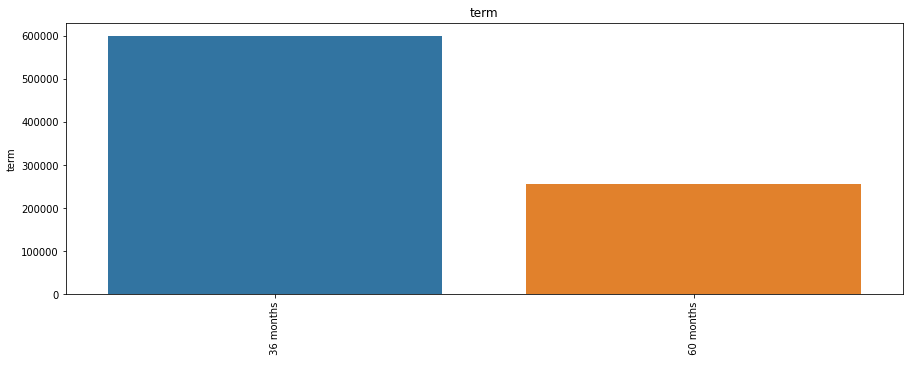

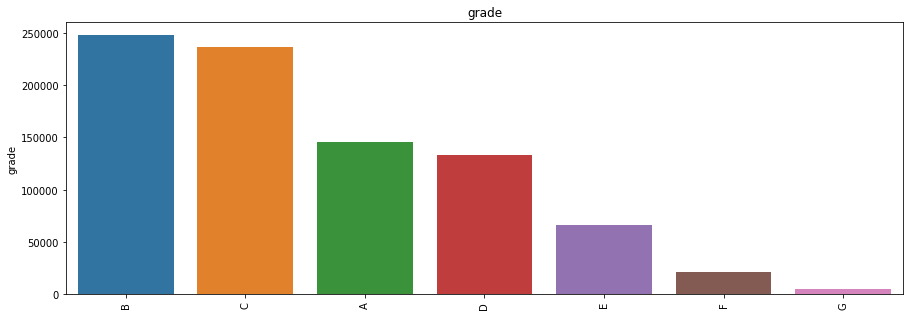

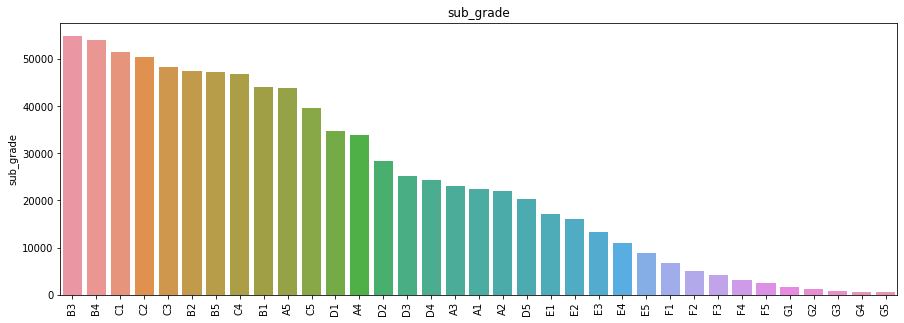

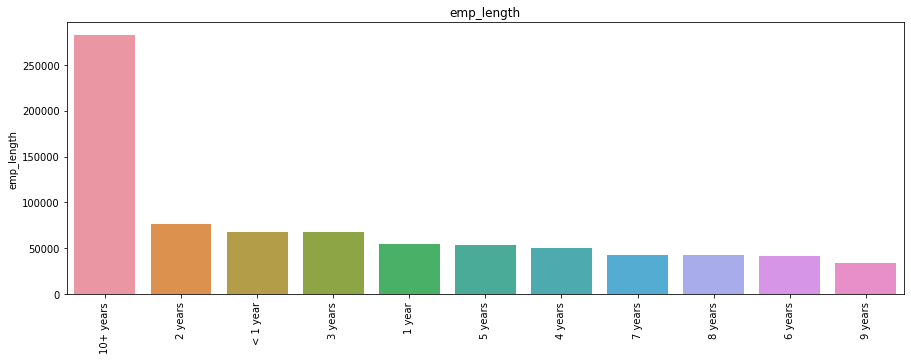

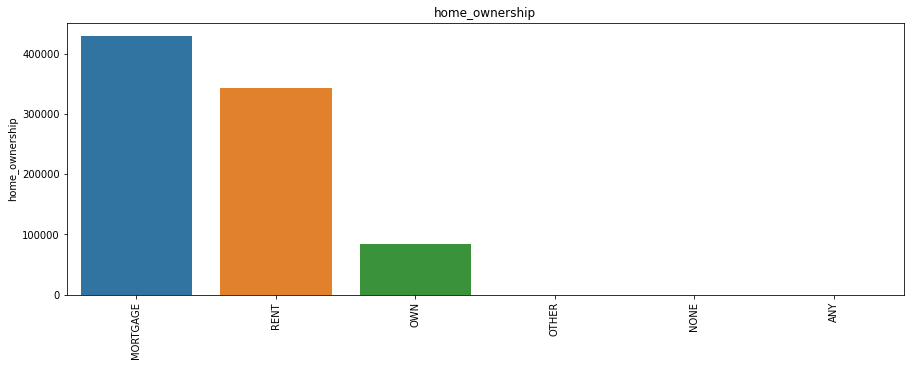

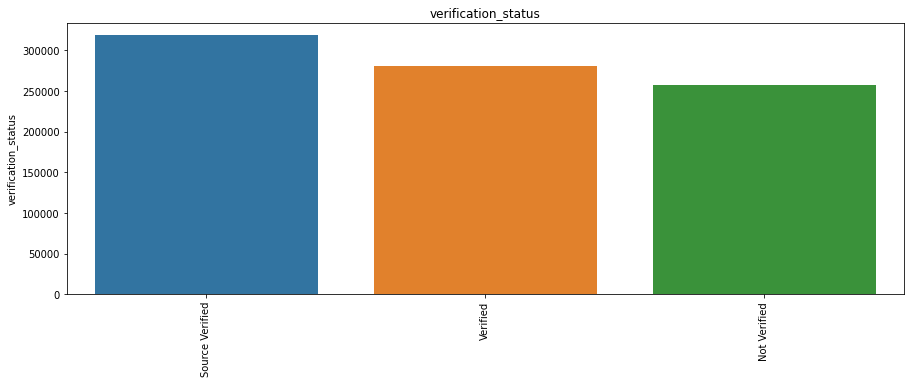

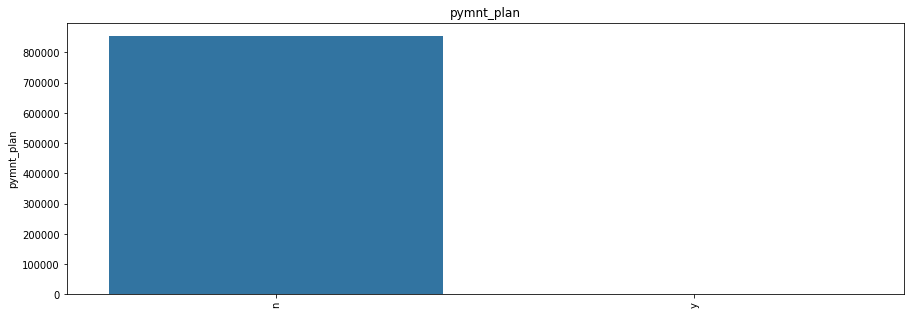

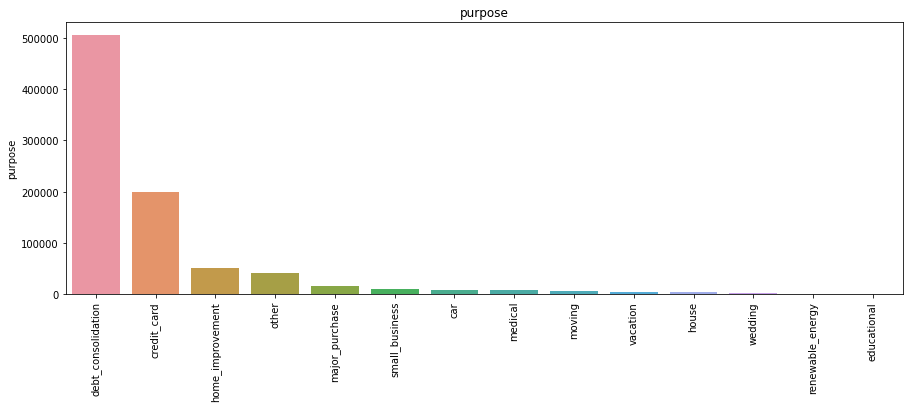

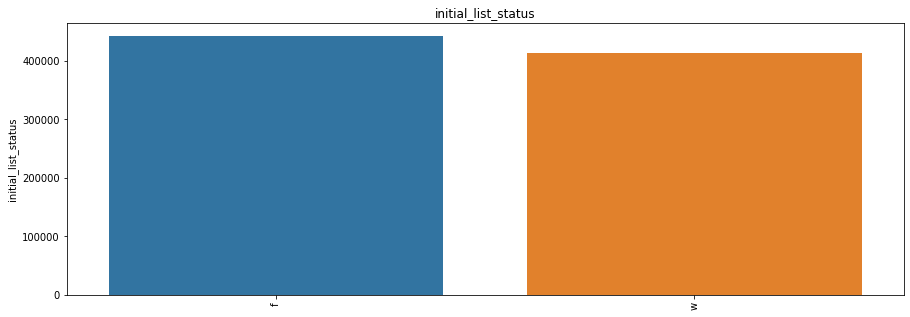

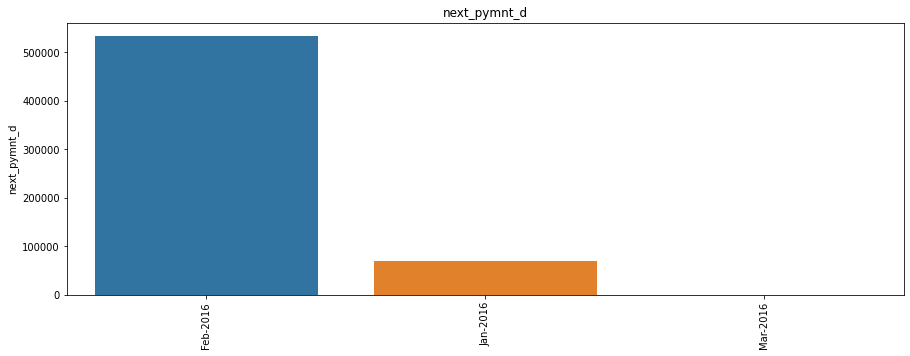

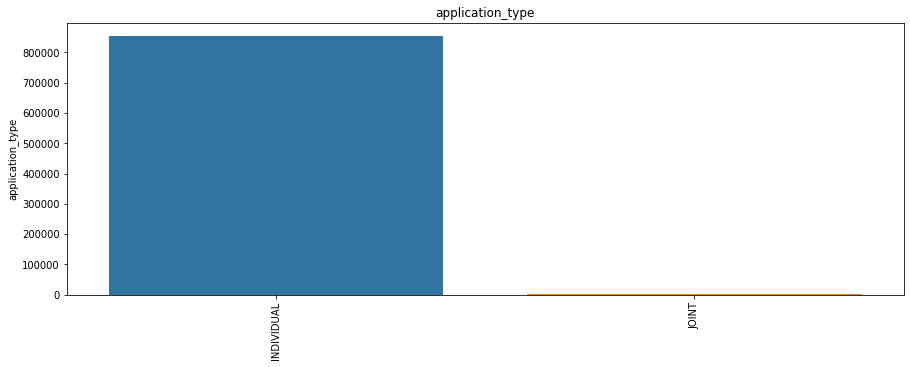

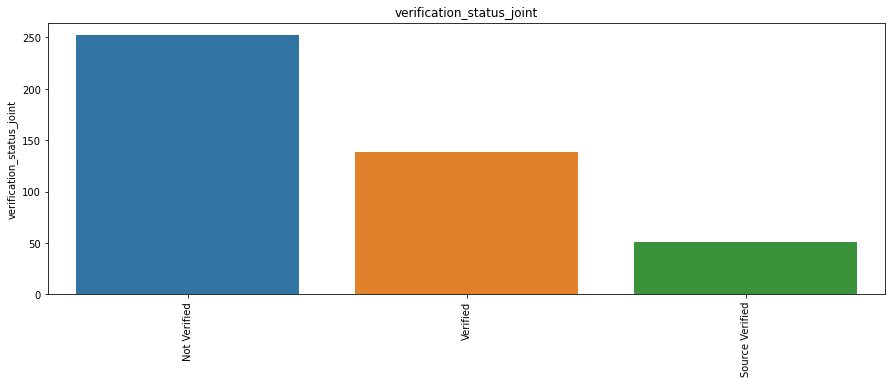

In [19]:
cols_uniques = {}
cats_with_more_than_36_levels = []
for i in Qualitative_cols:
  x = Qualitative_cols[i].value_counts()
  cols_uniques[i] = x.index.tolist()
  if (len(x.index) < 36):
    plt.figure(figsize= (15,5))
    plt.title(i)
    sns.barplot(x = x.index , y = x)
    plt.xticks(rotation = 90)
    plt.show()
  else:
    cats_with_more_than_36_levels.append(i)


In [343]:
Qualitative_cols.describe(include= 'all')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,855969,855969,855969,806526,812908,855969,855969,855969,855969,121812,855969,855936,855969,855969,855969,855969,847107,602998,855919,855969,442
unique,2,7,35,290912,11,6,3,103,2,120335,14,60991,931,51,697,2,97,3,102,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,n,,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,600221,247998,54958,12965,282090,429106,318178,48212,855964,231,505392,398089,9466,125172,6433,442555,467510,534094,701687,855527,252


## **Univariate Analysis of Quantitative Features**

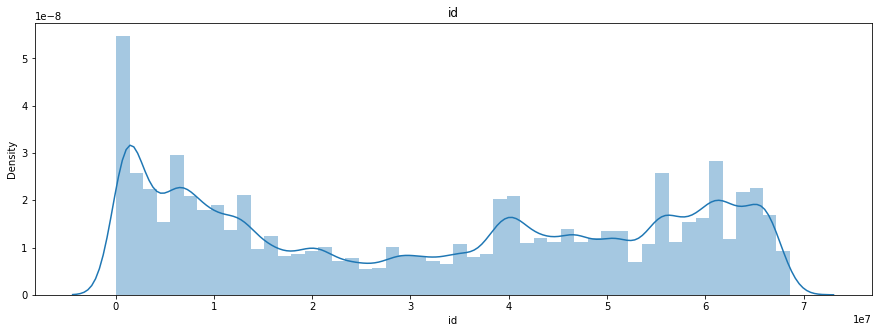

count      855969
mean     32240726
std      22719691
min         54734
25%       9067986
50%      34313546
75%      54463114
max      68616867
Name: id, dtype: int64


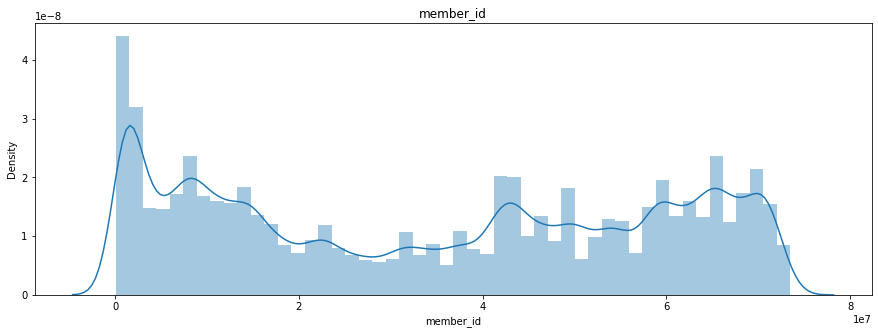

count      855969
mean     34762690
std      23994176
min         70699
25%      10792732
50%      36975319
75%      58035586
max      73519693
Name: member_id, dtype: int64


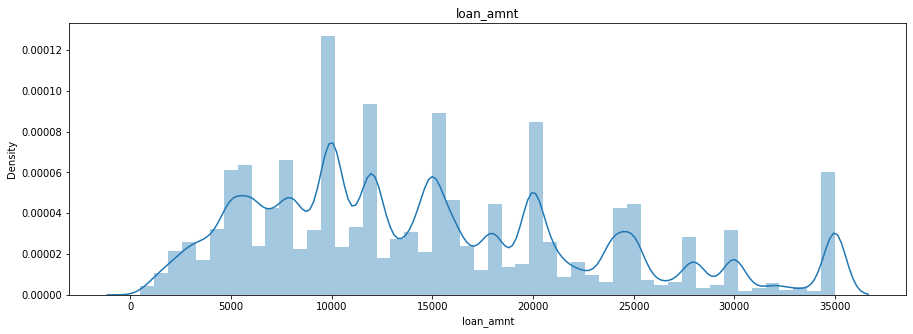

count    855969
mean      14745
std        8425
min         500
25%        8000
50%       13000
75%       20000
max       35000
Name: loan_amnt, dtype: int64


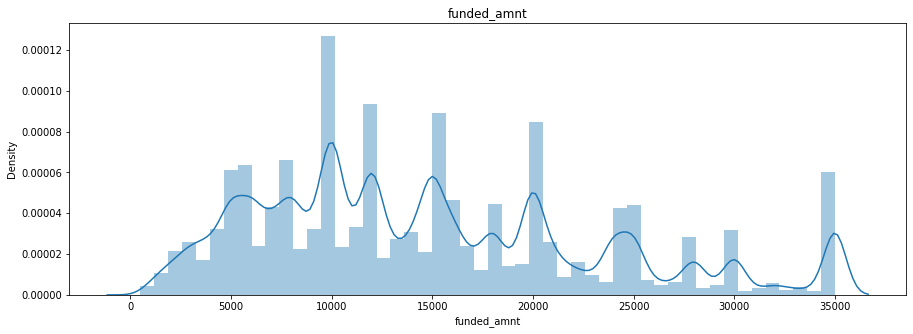

count    855969
mean      14732
std        8419
min         500
25%        8000
50%       13000
75%       20000
max       35000
Name: funded_amnt, dtype: int64


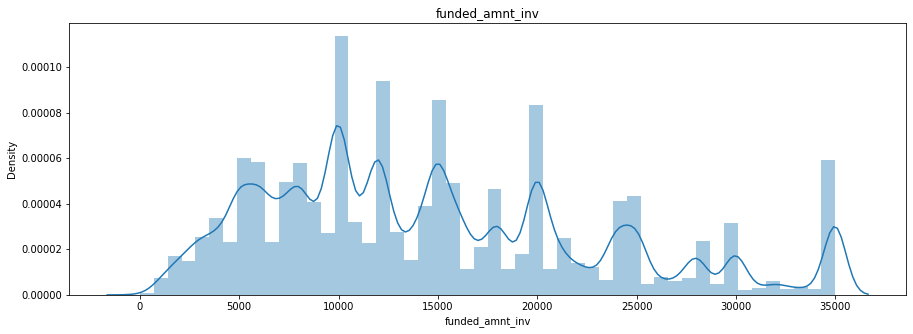

count    855969
mean      14700
std        8425
min           0
25%        8000
50%       13000
75%       20000
max       35000
Name: funded_amnt_inv, dtype: int64


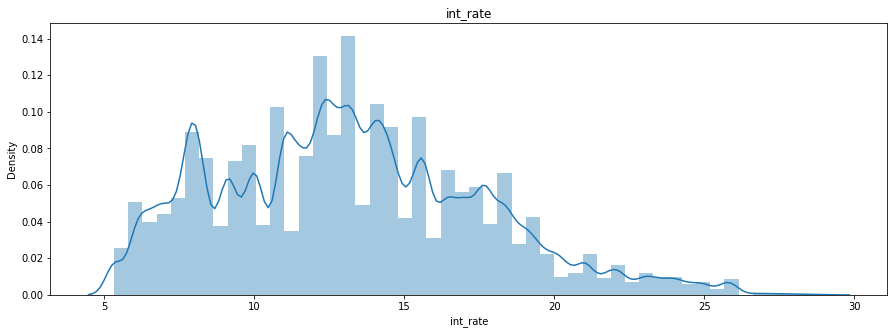

count    855969
mean         13
std           4
min           5
25%           9
50%          12
75%          15
max          28
Name: int_rate, dtype: int64


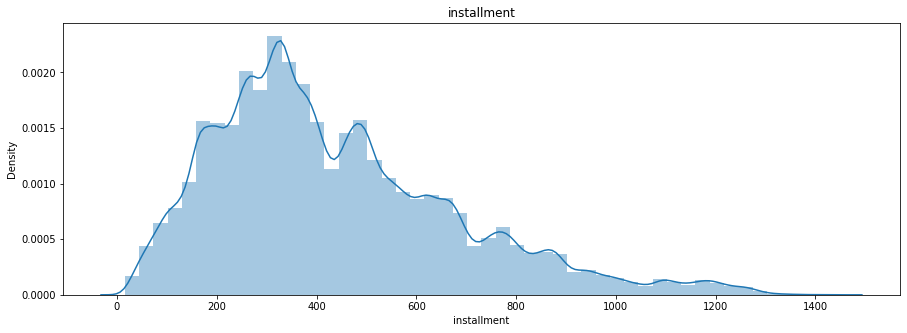

count    855969
mean        436
std         243
min          15
25%         260
50%         382
75%         571
max        1445
Name: installment, dtype: int64


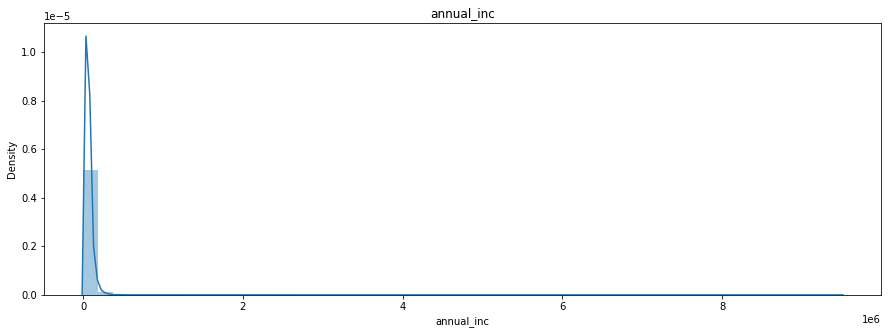

count     855969
mean       75071
std        64264
min            0
25%        45000
50%        65000
75%        90000
max      9500000
Name: annual_inc, dtype: int64


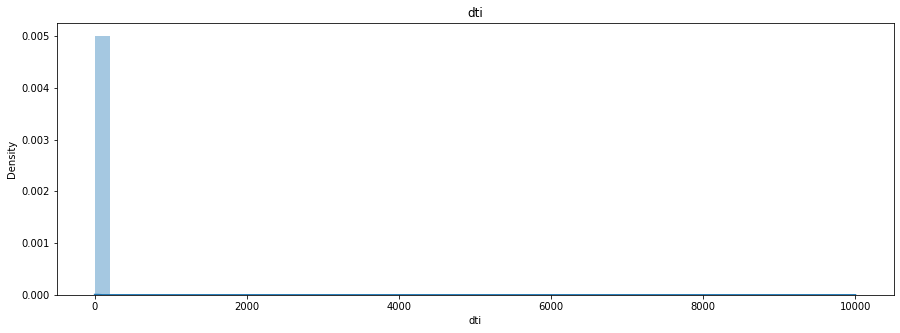

count    855969
mean         18
std          17
min           0
25%          11
50%          17
75%          23
max        9999
Name: dti, dtype: int64


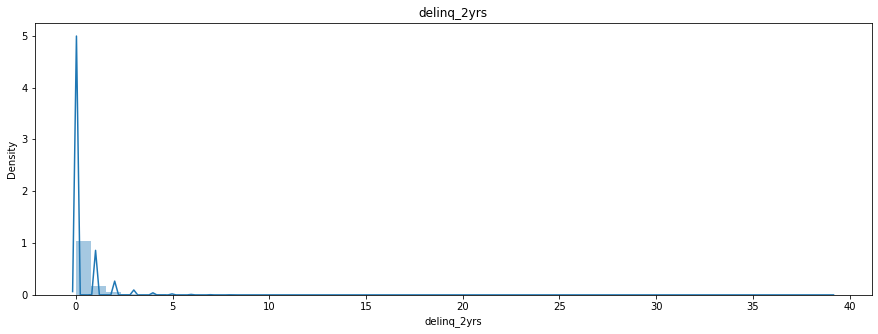

count    855969
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max          39
Name: delinq_2yrs, dtype: int64


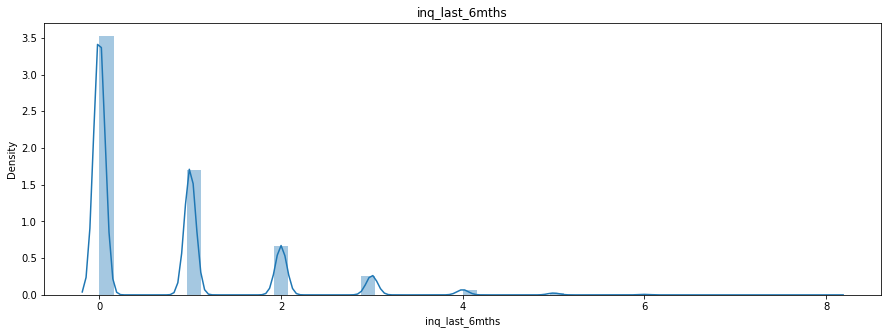

count    855969
mean          0
std           0
min           0
25%           0
50%           0
75%           1
max           8
Name: inq_last_6mths, dtype: int64


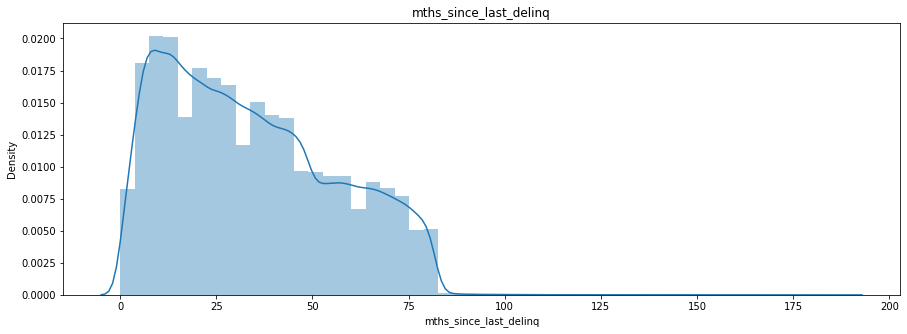

count    416157
mean         34
std          21
min           0
25%          15
50%          31
75%          50
max         188
Name: mths_since_last_delinq, dtype: int64


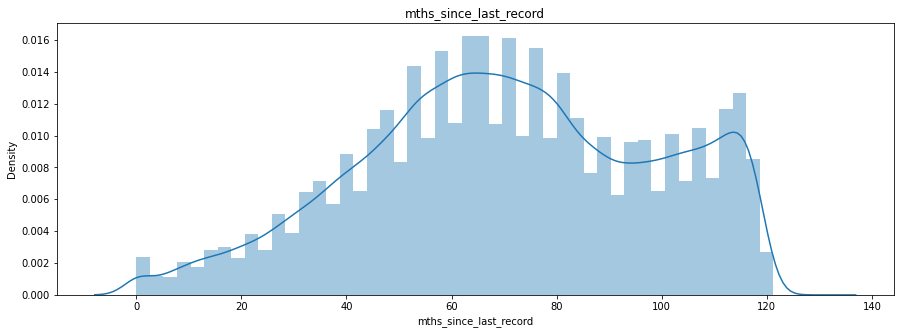

count    131184
mean         70
std          27
min           0
25%          51
50%          70
75%          92
max         129
Name: mths_since_last_record, dtype: int64


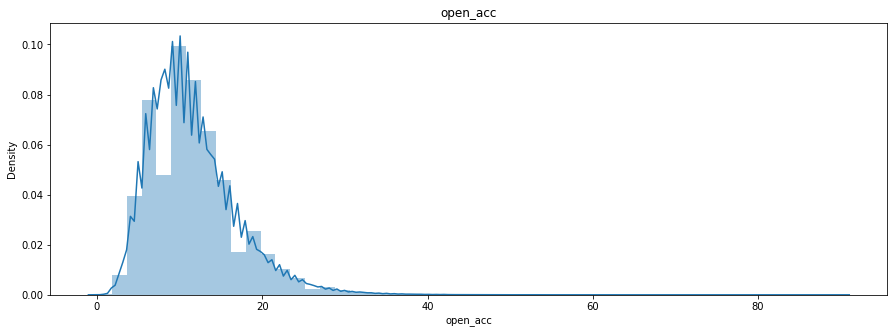

count    855969
mean         11
std           5
min           0
25%           8
50%          11
75%          14
max          90
Name: open_acc, dtype: int64


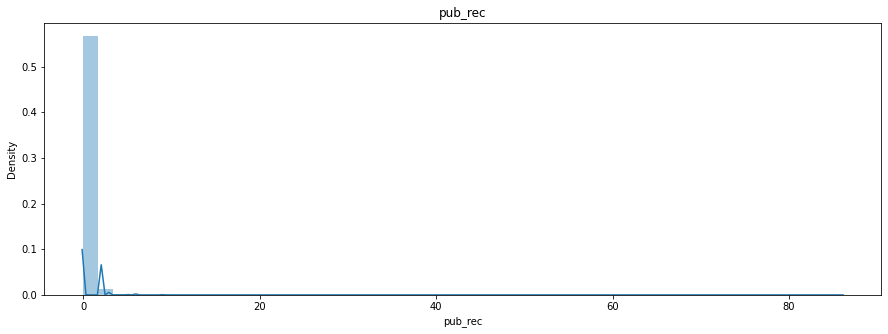

count    855969
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max          86
Name: pub_rec, dtype: int64


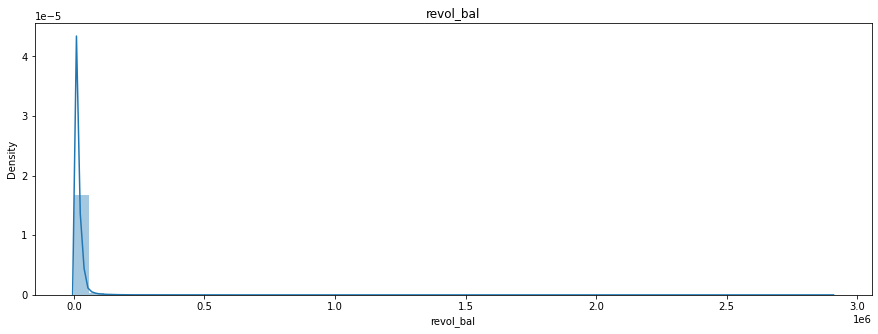

count     855969
mean       16910
std        22223
min            0
25%         6469
50%        11903
75%        20857
max      2904836
Name: revol_bal, dtype: int64


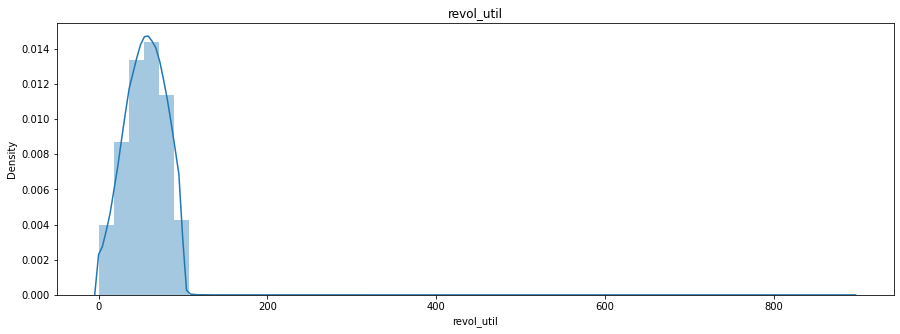

count    855523
mean         55
std          23
min           0
25%          37
50%          55
75%          73
max         892
Name: revol_util, dtype: int64


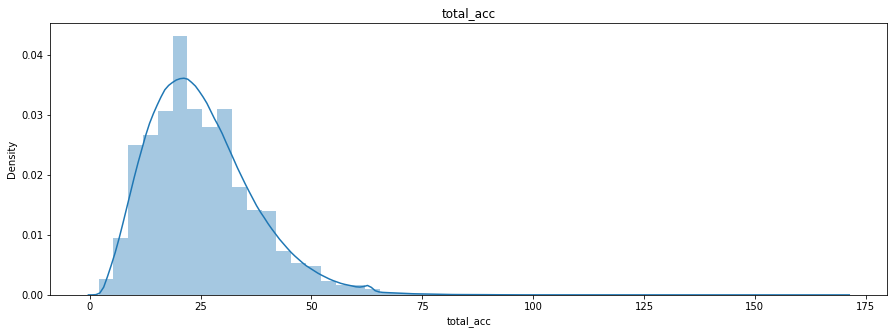

count    855969
mean         25
std          11
min           2
25%          17
50%          24
75%          32
max         169
Name: total_acc, dtype: int64


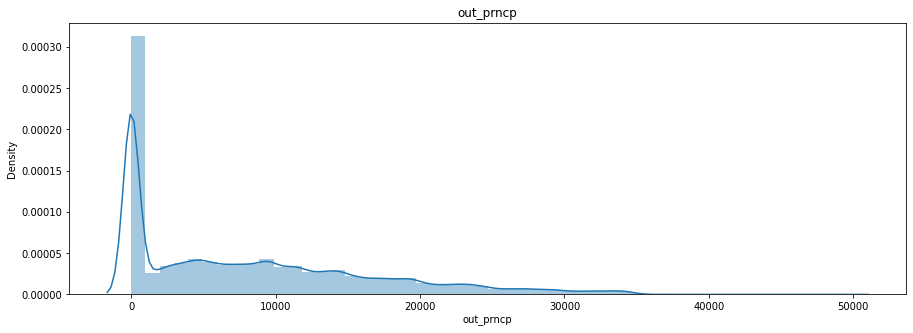

count    855969
mean       8284
std        8461
min           0
25%           0
50%        6290
75%       13528
max       49372
Name: out_prncp, dtype: int64


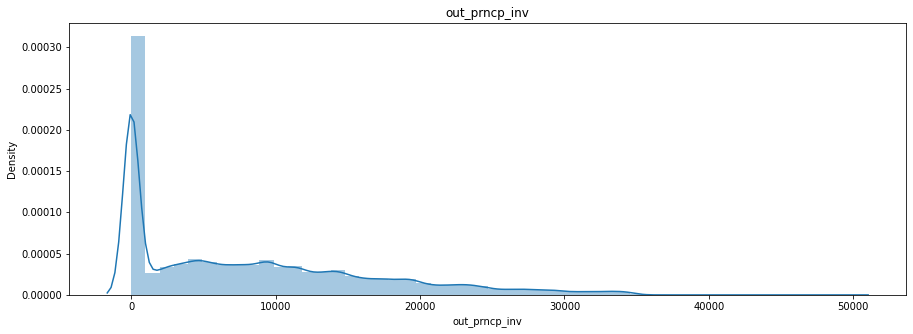

count    855969
mean       8281
std        8458
min           0
25%           0
50%        6287
75%       13522
max       49372
Name: out_prncp_inv, dtype: int64


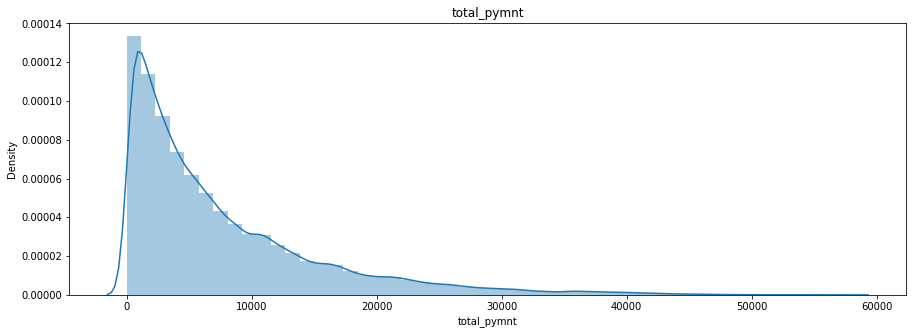

count    855969
mean       7653
std        7909
min           0
25%        1969
50%        4976
75%       10744
max       57777
Name: total_pymnt, dtype: int64


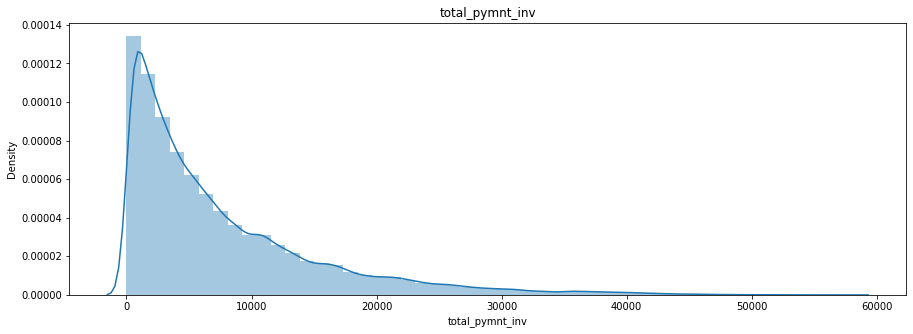

count    855969
mean       7622
std        7885
min           0
25%        1960
50%        4948
75%       10697
max       57777
Name: total_pymnt_inv, dtype: int64


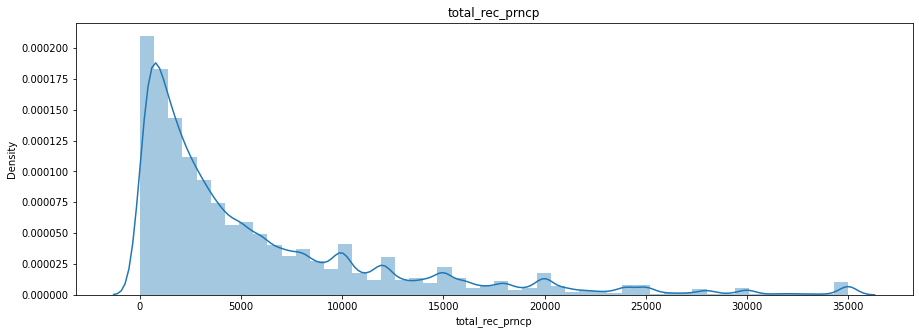

count    855969
mean       5850
std        6676
min           0
25%        1239
50%        3286
75%        8000
max       35000
Name: total_rec_prncp, dtype: int64


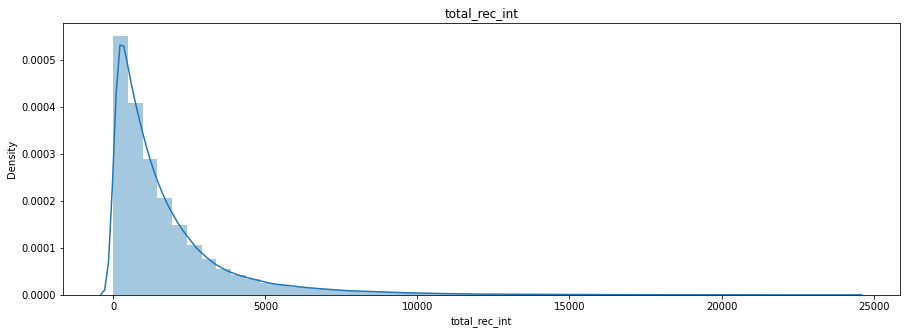

count    855969
mean       1755
std        2081
min           0
25%         451
50%        1076
75%        2233
max       24205
Name: total_rec_int, dtype: int64


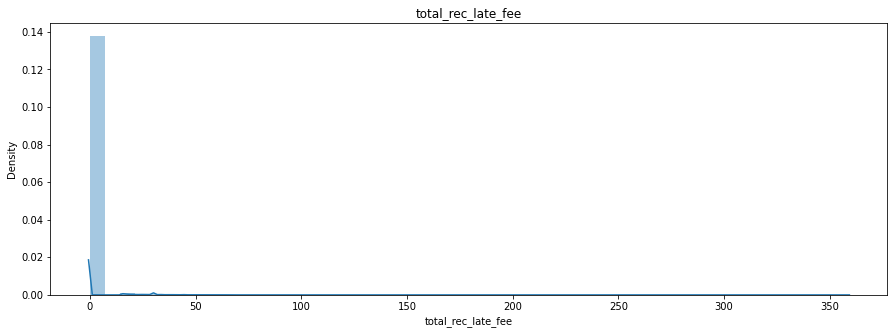

count    855969
mean          0
std           3
min           0
25%           0
50%           0
75%           0
max         358
Name: total_rec_late_fee, dtype: int64


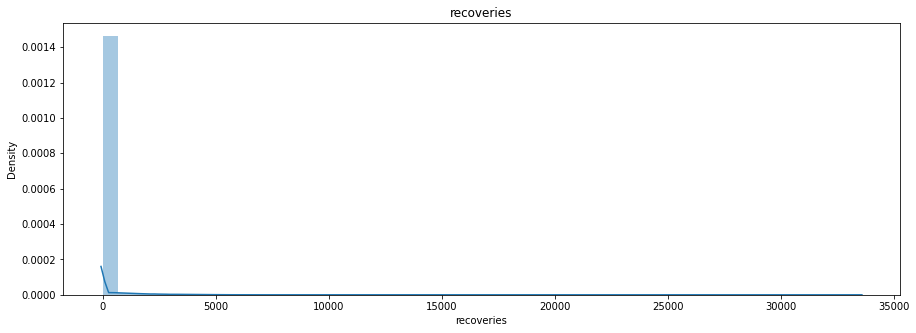

count    855969
mean         47
std         413
min           0
25%           0
50%           0
75%           0
max       33520
Name: recoveries, dtype: int64


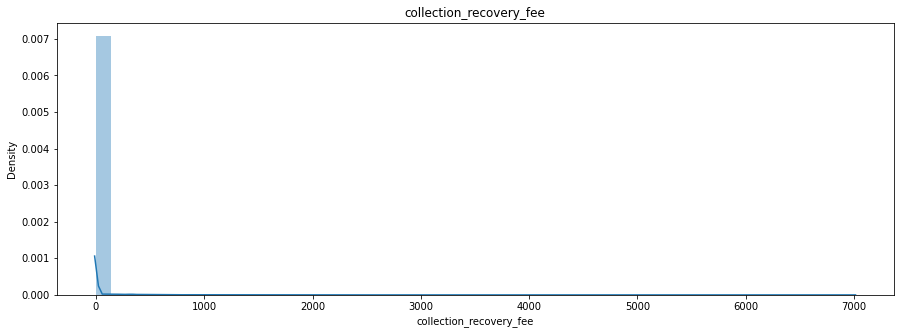

count    855969
mean          4
std          62
min           0
25%           0
50%           0
75%           0
max        7002
Name: collection_recovery_fee, dtype: int64


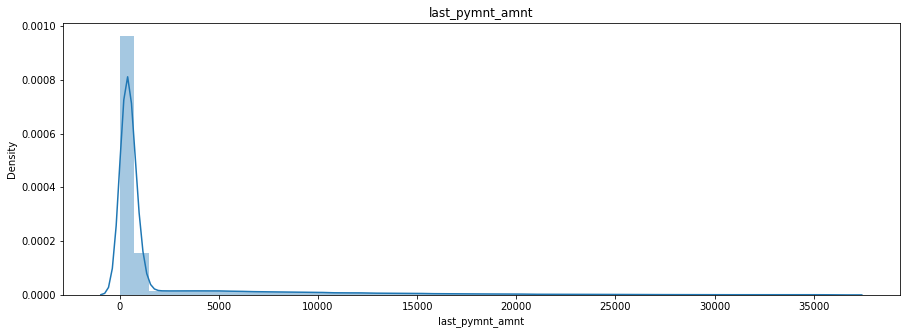

count    855969
mean       2225
std        4864
min           0
25%         285
50%         468
75%         849
max       36475
Name: last_pymnt_amnt, dtype: int64


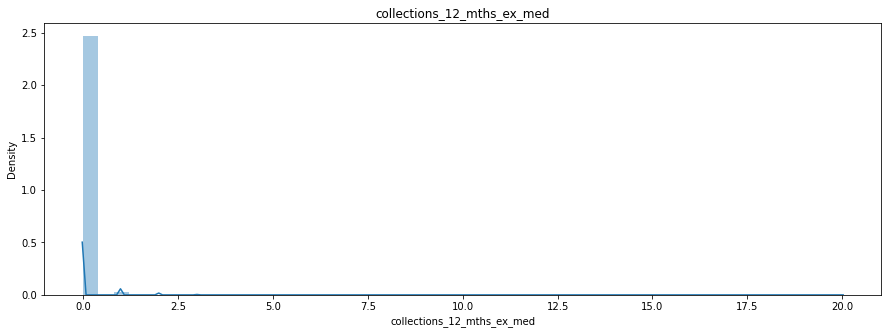

count    855913
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max          20
Name: collections_12_mths_ex_med, dtype: int64


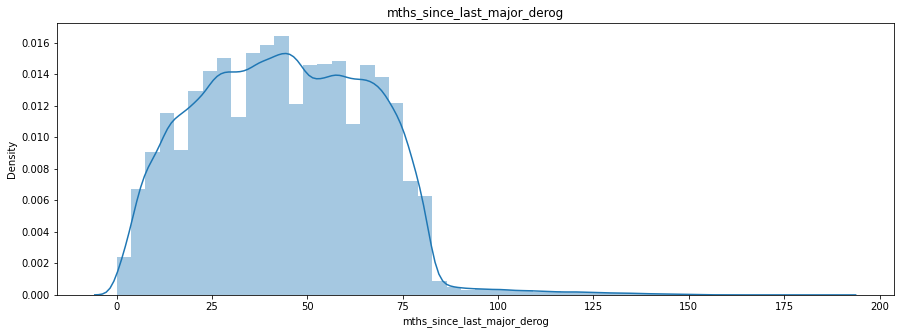

count    213139
mean         44
std          22
min           0
25%          27
50%          44
75%          61
max         188
Name: mths_since_last_major_derog, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


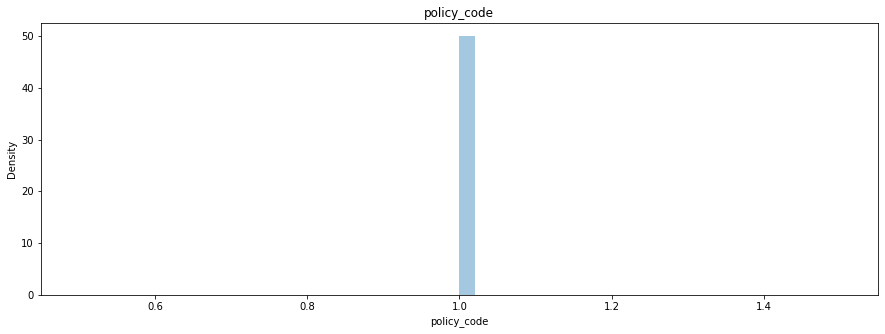

count    855969
mean          1
std           0
min           1
25%           1
50%           1
75%           1
max           1
Name: policy_code, dtype: int64


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1780: RuntimeWarning: invalid value encountered in true_divide
  w = (y - xbar) / s


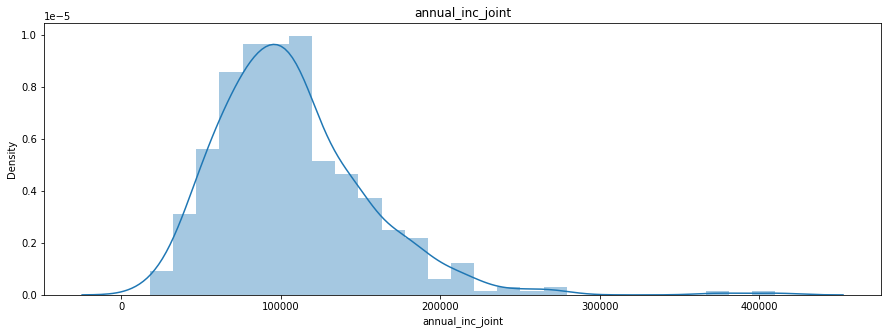

count       442
mean     107412
std       47987
min       17950
25%       75000
50%      100000
75%      130750
max      410000
Name: annual_inc_joint, dtype: int64


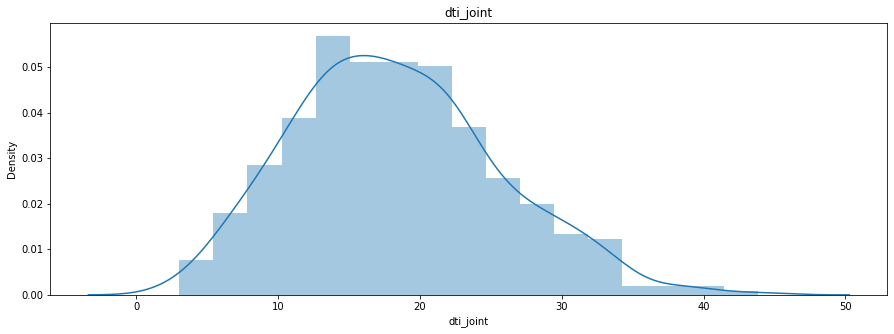

count    440
mean      18
std        7
min        3
25%       13
50%       17
75%       22
max       43
Name: dti_joint, dtype: int64


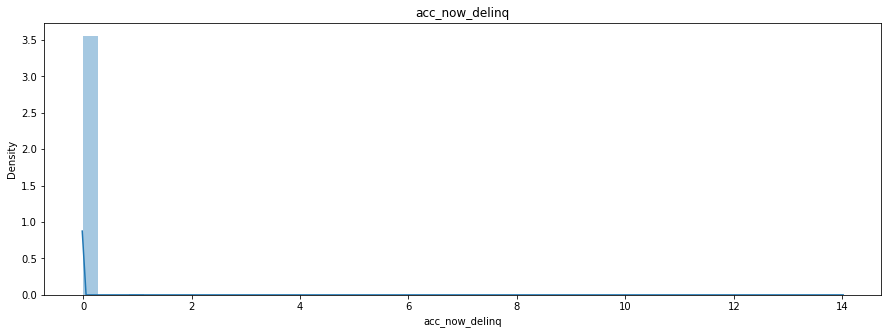

count    855969
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max          14
Name: acc_now_delinq, dtype: int64


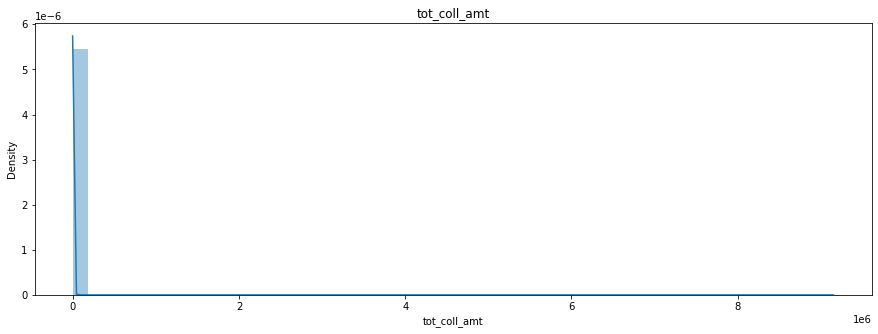

count     788656
mean         225
std        10489
min            0
25%            0
50%            0
75%            0
max      9152545
Name: tot_coll_amt, dtype: int64


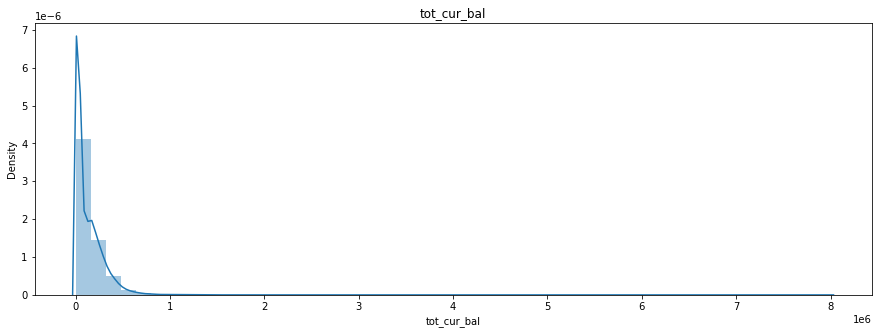

count     788656
mean      139766
std       153938
min            0
25%        29870
50%        81008
75%       208703
max      8000078
Name: tot_cur_bal, dtype: int64


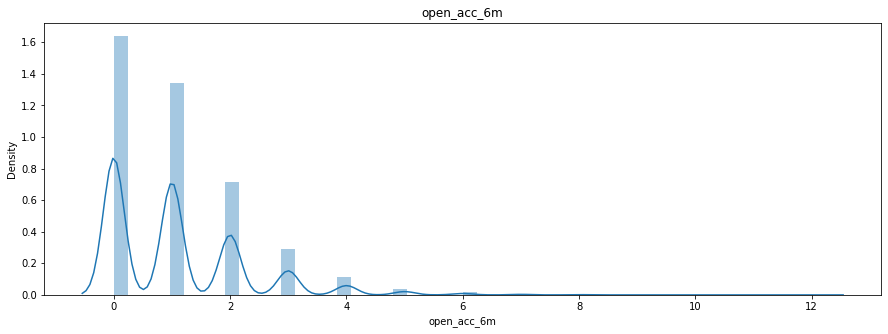

count    13288
mean         1
std          1
min          0
25%          0
50%          1
75%          2
max         12
Name: open_acc_6m, dtype: int64


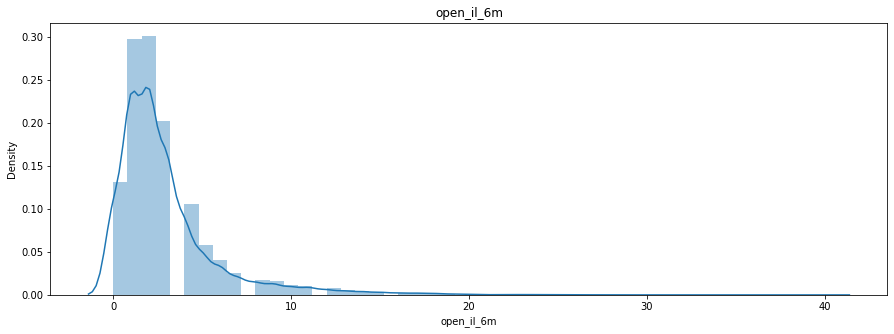

count    13288
mean         2
std          3
min          0
25%          1
50%          2
75%          4
max         40
Name: open_il_6m, dtype: int64


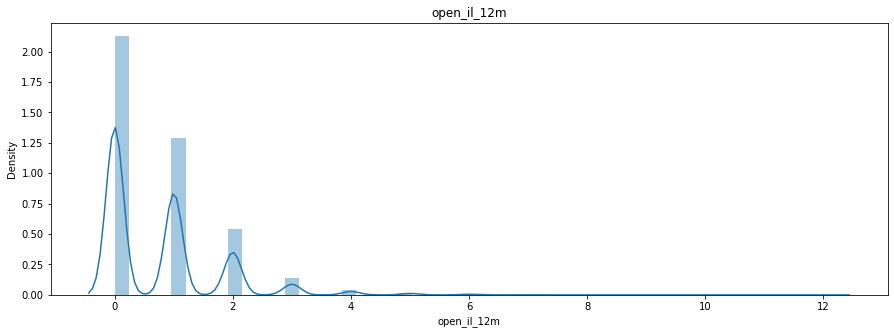

count    13288
mean         0
std          0
min          0
25%          0
50%          0
75%          1
max         12
Name: open_il_12m, dtype: int64


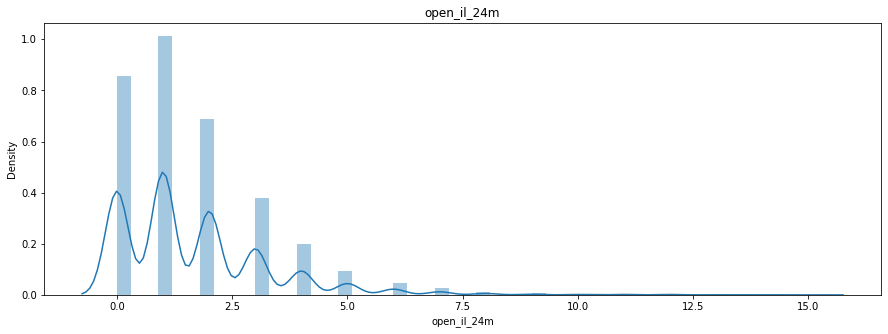

count    13288
mean         1
std          1
min          0
25%          0
50%          1
75%          2
max         15
Name: open_il_24m, dtype: int64


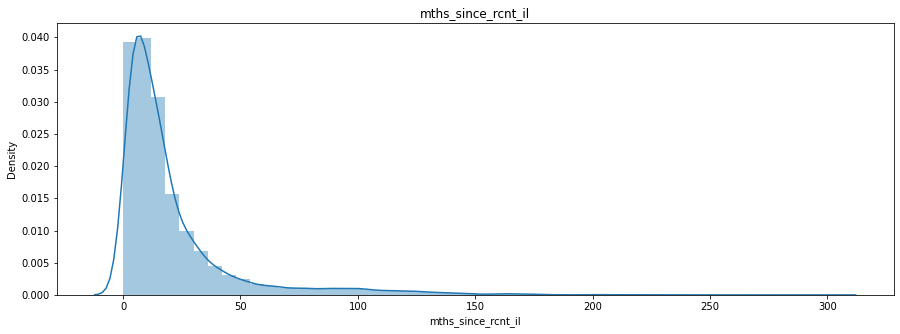

count    12934
mean        20
std         26
min          0
25%          6
50%         12
75%         23
max        300
Name: mths_since_rcnt_il, dtype: int64


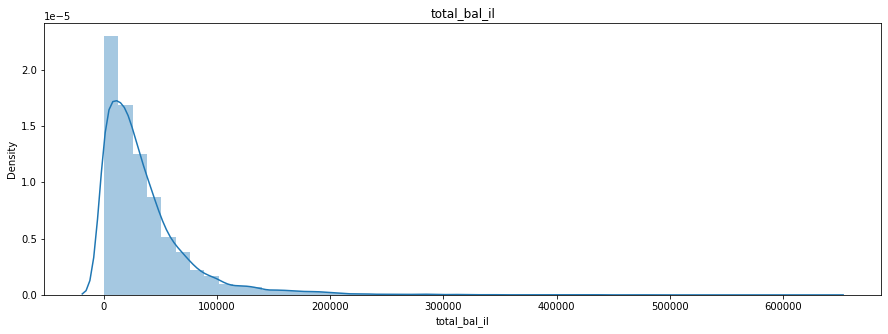

count     13288
mean      36511
std       42492
min           0
25%       10390
50%       24959
75%       47493
max      634217
Name: total_bal_il, dtype: int64


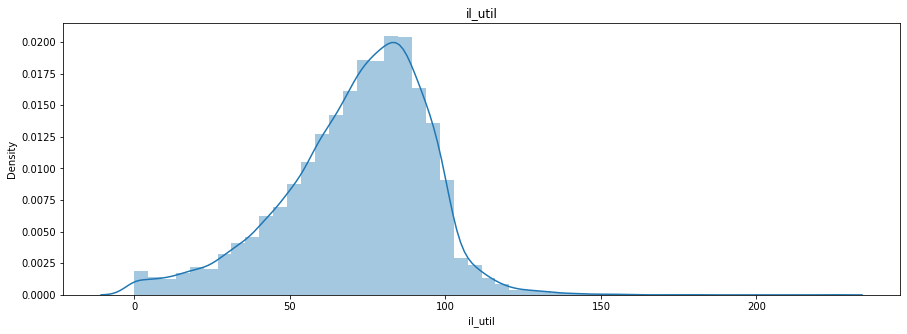

count    11609
mean        71
std         23
min          0
25%         58
50%         75
75%         87
max        223
Name: il_util, dtype: int64


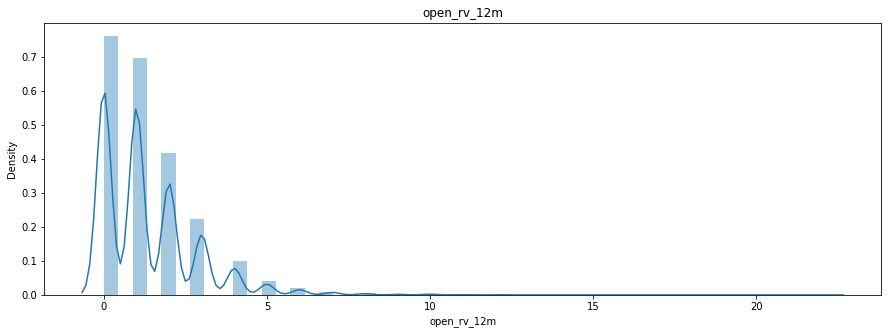

count    13288
mean         1
std          1
min          0
25%          0
50%          1
75%          2
max         22
Name: open_rv_12m, dtype: int64


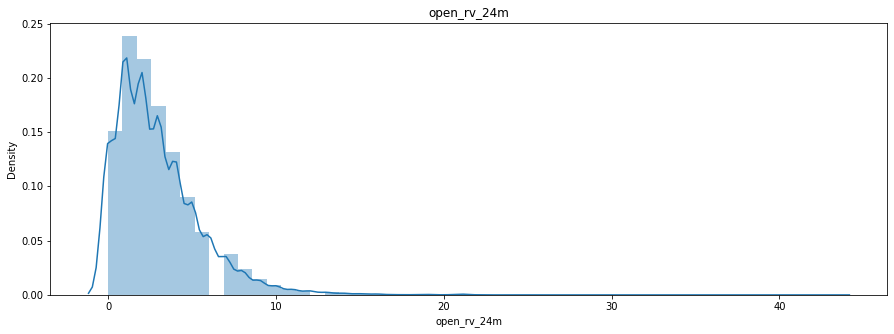

count    13288
mean         2
std          2
min          0
25%          1
50%          2
75%          4
max         43
Name: open_rv_24m, dtype: int64


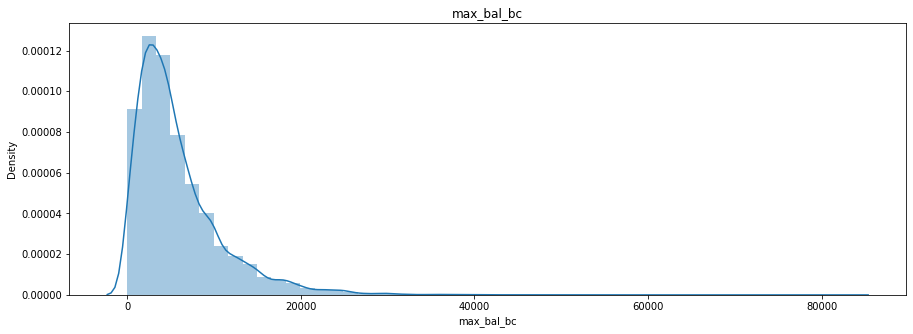

count    13288
mean      5840
std       5108
min          0
25%       2405
50%       4485
75%       7701
max      83047
Name: max_bal_bc, dtype: int64


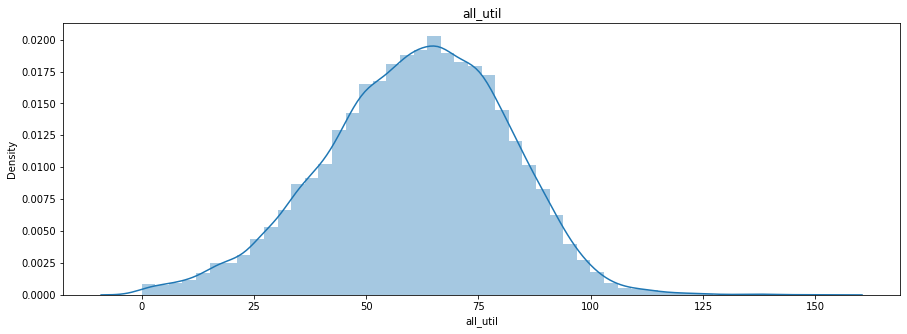

count    13288
mean        61
std         20
min          0
25%         47
50%         62
75%         75
max        151
Name: all_util, dtype: int64


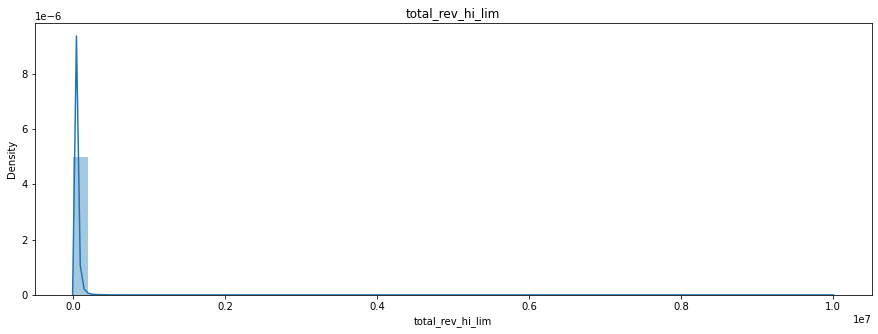

count     788656
mean       32163
std        37699
min            0
25%        14000
50%        23800
75%        39900
max      9999999
Name: total_rev_hi_lim, dtype: int64


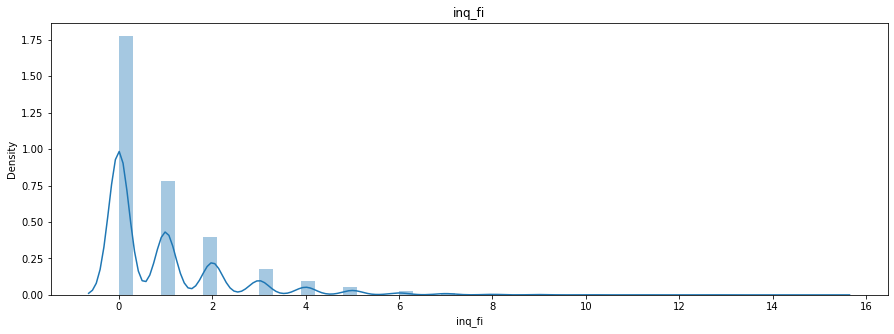

count    13288
mean         0
std          1
min          0
25%          0
50%          0
75%          1
max         15
Name: inq_fi, dtype: int64


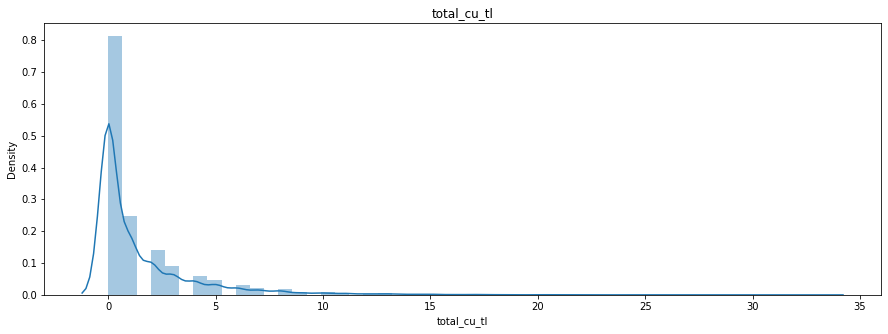

count    13288
mean         1
std          2
min          0
25%          0
50%          0
75%          2
max         33
Name: total_cu_tl, dtype: int64


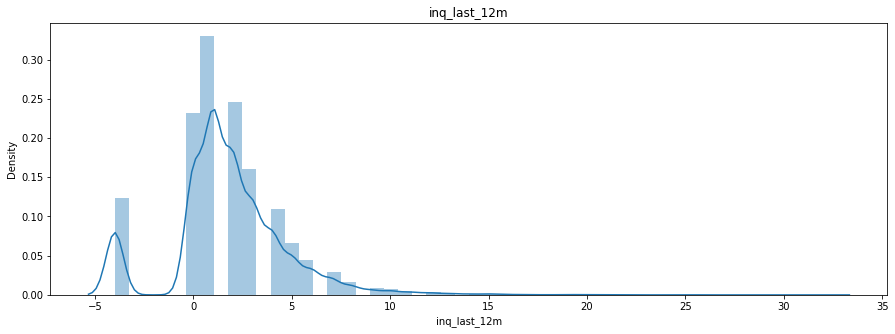

count    13288
mean         1
std          2
min         -4
25%          0
50%          2
75%          3
max         32
Name: inq_last_12m, dtype: int64


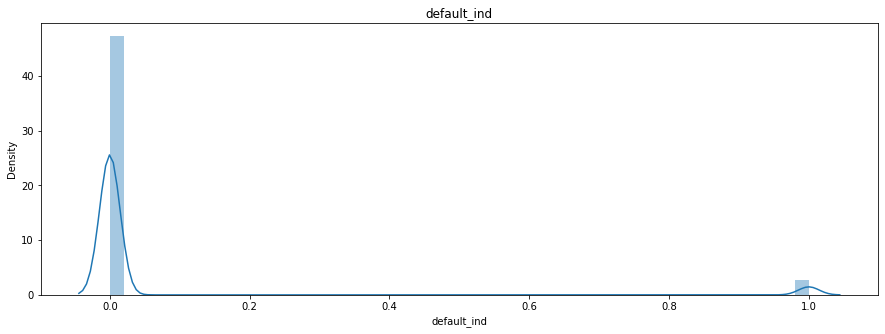

count    855969
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max           1
Name: default_ind, dtype: int64


In [35]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

in_normal_dist_or_not = {}

from scipy.stats import anderson

for i in Quantitative_cols:
  plt.figure(figsize = (15,5))
  plt.title(i)
  sns.distplot(Quantitative_cols[i])
  plt.show()

  print(Quantitative_cols[i].describe().astype(int))

  result = anderson(Quantitative_cols[i].dropna(), dist = 'norm')
  if(result.statistic < result.critical_values[2]):
     # Checking for a confidence of a 95%
    in_normal_dist_or_not[i] = 'Normal Distribution'
  else:
    in_normal_dist_or_not[i] = 'Not Normal Distribution'


In [345]:
Quantitative_cols.describe().astype(int)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,416157,131184,855969,855969,855969,855523,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855913,213139,855969,442,440,855969,788656,788656,13288,13288,13288,13288,12934,13288,11609,13288,13288,13288,13288,788656,13288,13288,13288,855969
mean,32240726,34762690,14745,14732,14700,13,436,75071,18,0,0,34,70,11,0,16910,55,25,8284,8281,7653,7622,5850,1755,0,47,4,2225,0,44,1,107412,18,0,225,139766,1,2,0,1,20,36511,71,1,2,5840,61,32163,0,1,1,0
std,22719691,23994176,8425,8419,8425,4,243,64264,17,0,0,21,27,5,0,22223,23,11,8461,8458,7909,7885,6676,2081,3,413,62,4864,0,22,0,47987,7,0,10489,153938,1,3,0,1,26,42492,23,1,2,5108,20,37699,1,2,2,0
min,54734,70699,500,500,0,5,15,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,17950,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4,0
25%,9067986,10792732,8000,8000,8000,9,260,45000,11,0,0,15,51,8,0,6469,37,17,0,0,1969,1960,1239,451,0,0,0,285,0,27,1,75000,13,0,0,29870,0,1,0,0,6,10390,58,0,1,2405,47,14000,0,0,0,0
50%,34313546,36975319,13000,13000,13000,12,382,65000,17,0,0,31,70,11,0,11903,55,24,6290,6287,4976,4948,3286,1076,0,0,0,468,0,44,1,100000,17,0,0,81008,1,2,0,1,12,24959,75,1,2,4485,62,23800,0,0,2,0
75%,54463114,58035586,20000,20000,20000,15,571,90000,23,0,1,50,92,14,0,20857,73,32,13528,13522,10744,10697,8000,2233,0,0,0,849,0,61,1,130750,22,0,0,208703,2,4,1,2,23,47493,87,2,4,7701,75,39900,1,2,3,0
max,68616867,73519693,35000,35000,35000,28,1445,9500000,9999,39,8,188,129,90,86,2904836,892,169,49372,49372,57777,57777,35000,24205,358,33520,7002,36475,20,188,1,410000,43,14,9152545,8000078,12,40,12,15,300,634217,223,22,43,83047,151,9999999,15,33,32,1


# **Bivariate Analysis**

### Bivariate Analysis using Chi Square test of contingency between two categorical features

In [346]:
# Checking the relationship between categorical and categorical feataures
from scipy.stats import chi2_contingency
from scipy.stats import chi2

categorical_dependencies = {}

for i in Qualitative_cols.columns:
  x = pd.crosstab(df[i], df['default_ind'])
  stat, p, dof, expected = chi2_contingency(x)
  alpha = 0.05
  if(p <= alpha):
    categorical_dependencies[i] = 'Dependent'
  else:
    categorical_dependencies[i] = 'Independent' 

In [351]:
categorical_dependencies

{'addr_state': 'Dependent',
 'application_type': 'Dependent',
 'desc': 'Independent',
 'earliest_cr_line': 'Dependent',
 'emp_length': 'Dependent',
 'emp_title': 'Dependent',
 'grade': 'Dependent',
 'home_ownership': 'Dependent',
 'initial_list_status': 'Dependent',
 'issue_d': 'Dependent',
 'last_credit_pull_d': 'Dependent',
 'last_pymnt_d': 'Dependent',
 'next_pymnt_d': 'Dependent',
 'purpose': 'Dependent',
 'pymnt_plan': 'Independent',
 'sub_grade': 'Dependent',
 'term': 'Dependent',
 'title': 'Dependent',
 'verification_status': 'Dependent',
 'verification_status_joint': 'Independent',
 'zip_code': 'Dependent'}

# ***Bivariate Analysis Between a cactegorical and numerical data***

In [352]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [356]:
Nums = Quantitative_cols.drop(['id','member_id', 'default_ind'], axis= 1)
Nums.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [365]:
num_dependencies = {}
for i in Nums.columns:
  c=i+'~default_ind'
  mod = ols(c, data = df).fit()
  anova = sm.stats.anova_lm(mod,type = 1)
  if(anova['PR(>F)'][0] < 0.05):
    num_dependencies[i] = 'Dependent'
  else:
    num_dependencies[i] = 'Independent'

In [366]:
num_dependencies

{'acc_now_delinq': 'Dependent',
 'all_util': 'Independent',
 'annual_inc': 'Dependent',
 'annual_inc_joint': 'Independent',
 'collection_recovery_fee': 'Dependent',
 'collections_12_mths_ex_med': 'Dependent',
 'delinq_2yrs': 'Dependent',
 'dti': 'Dependent',
 'dti_joint': 'Independent',
 'funded_amnt': 'Dependent',
 'funded_amnt_inv': 'Dependent',
 'il_util': 'Dependent',
 'inq_fi': 'Independent',
 'inq_last_12m': 'Independent',
 'inq_last_6mths': 'Dependent',
 'installment': 'Dependent',
 'int_rate': 'Dependent',
 'last_pymnt_amnt': 'Dependent',
 'loan_amnt': 'Dependent',
 'max_bal_bc': 'Dependent',
 'mths_since_last_delinq': 'Independent',
 'mths_since_last_major_derog': 'Dependent',
 'mths_since_last_record': 'Dependent',
 'mths_since_rcnt_il': 'Independent',
 'open_acc': 'Dependent',
 'open_acc_6m': 'Independent',
 'open_il_12m': 'Independent',
 'open_il_24m': 'Independent',
 'open_il_6m': 'Independent',
 'open_rv_12m': 'Independent',
 'open_rv_24m': 'Independent',
 'out_prncp': 'D

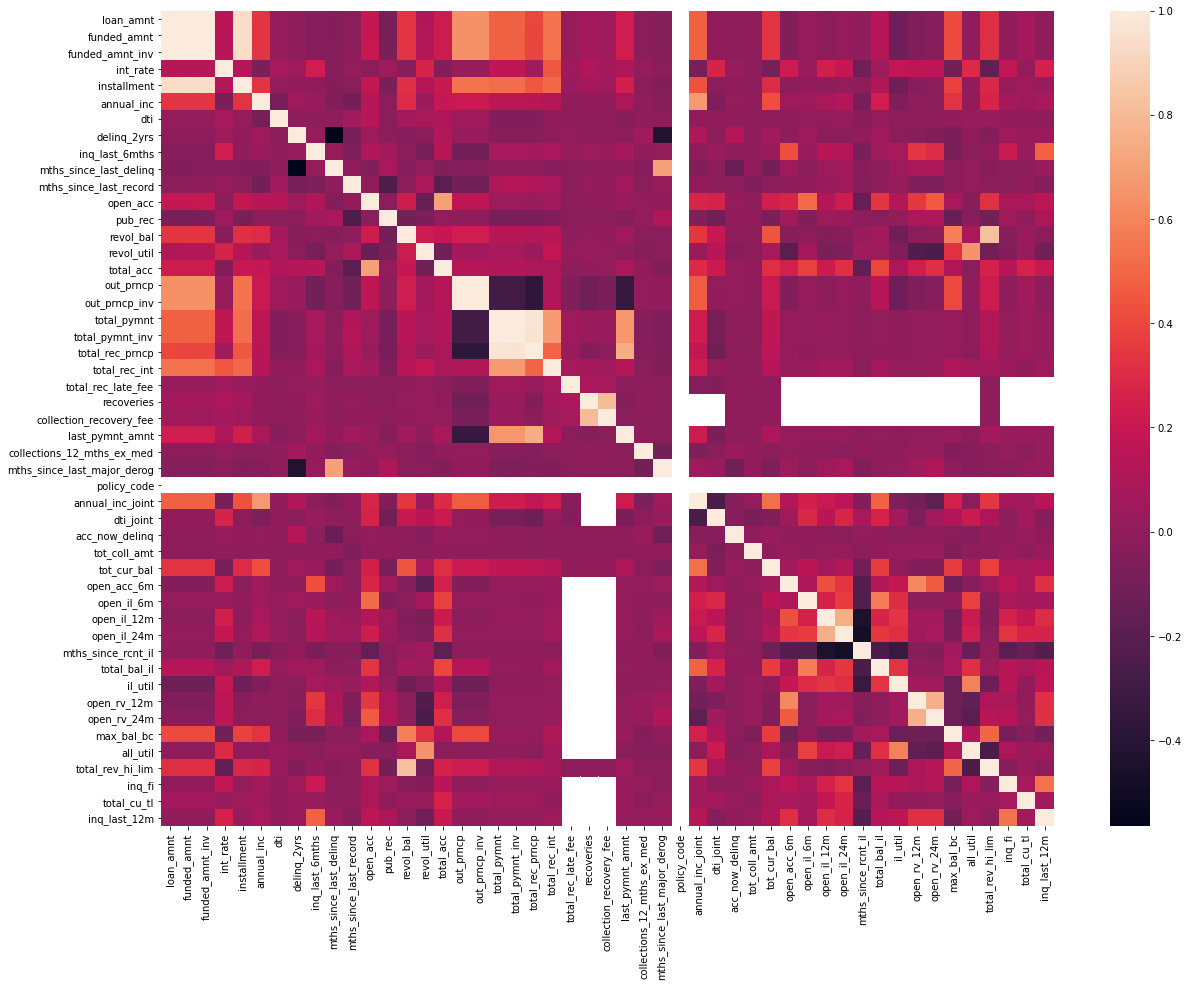

In [372]:
# Correlation Map of the Numerical Columns
plt.figure(figsize= (20,15))
sns.heatmap(Nums.corr())
#plt.grid()
plt.show()

In [99]:
 Dropables = ['id','member_id','emp_title','title','zip_code']

In [287]:
No_repayers = df[df['default_ind'] == 1]
Repayers = df[df['default_ind'] == 0]

# ***Analyzing the repayer and Non repayer activity in terms of Term***

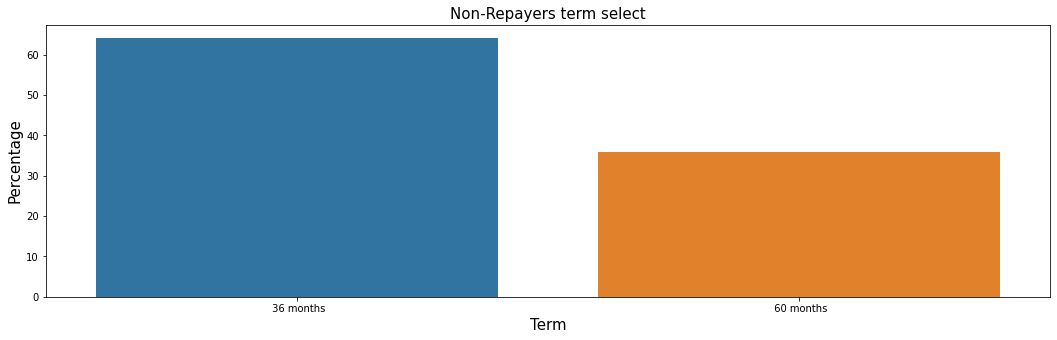

In [303]:
x = No_repayers['term'].value_counts()*100/No_repayers['term'].shape[0]
plt.figure(figsize= (18,5))
plt.title('Non-Repayers term select', fontsize = 15)
sns.barplot(x = x.index, y= x)
plt.xlabel('Term', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.show()

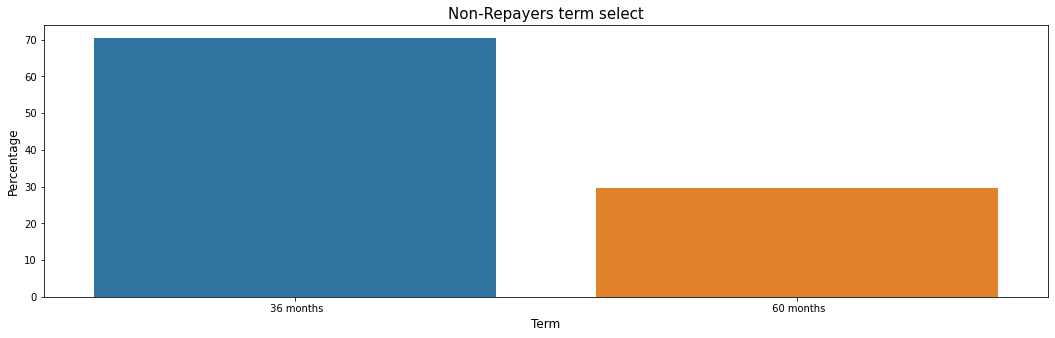

In [314]:
x = Repayers['term'].value_counts()*100/Repayers['term'].shape[0]
plt.figure(figsize= (18,5))
plt.title('Non-Repayers term select', fontsize = 15)
sns.barplot(x = x.index, y= x)
plt.xlabel('Term', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.show()

# ***Analyzing the repayer and Non repayer activity in terms of Grade***

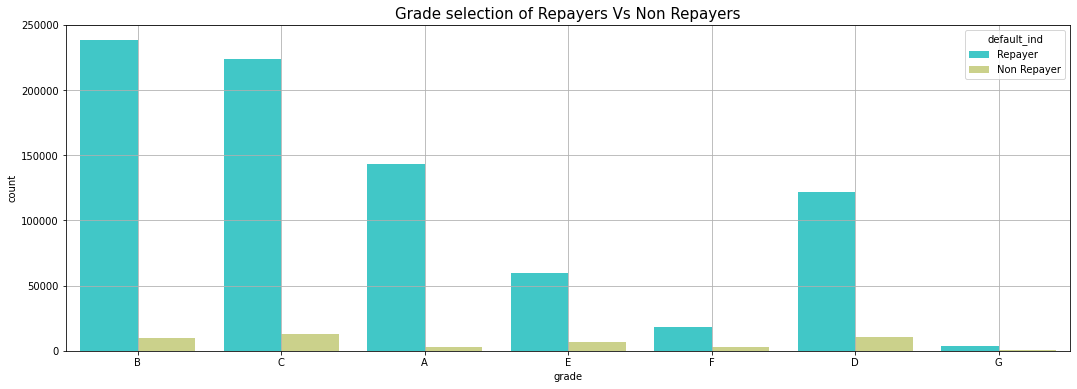

In [321]:
plt.figure(figsize = (18,6))
plt.title('Grade selection of Repayers Vs Non Repayers', fontsize = 15)
df['default_ind'].replace({0:'Repayer',1:'Non Repayer'}, inplace = True)
sns.countplot(x = 'grade',hue='default_ind',data = df, palette= 'rainbow');
plt.grid()
plt.show()

# ***Grade Spread in the Non Repayers***

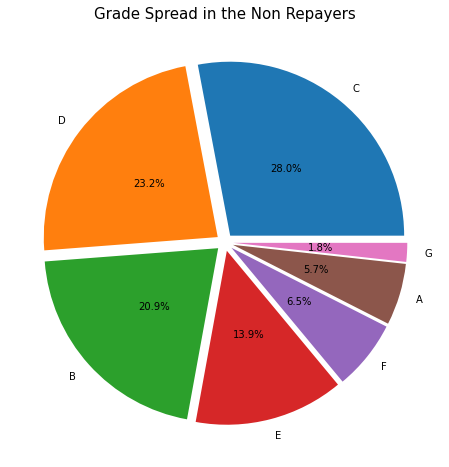

In [327]:
grade = No_repayers['grade'].value_counts()*100/No_repayers.shape[0]
labels = grade.index
plt.figure(figsize = (18,8))
plt.title('Grade Spread in the Non Repayers', fontsize = 15)
plt.pie(x=grade, autopct="%.1f%%", explode=[0.05]*7, labels=labels, pctdistance=0.5 );
plt.show()

# **Grade Spread In Repayers**

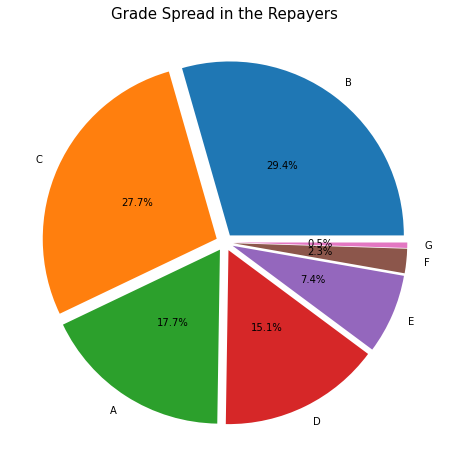

In [329]:
grade = Repayers['grade'].value_counts()*100/Repayers.shape[0]
labels = grade.index
plt.figure(figsize = (18,8))
plt.title('Grade Spread in the Repayers', fontsize = 15)
plt.pie(x=grade, autopct="%.1f%%", explode=[0.05]*7, labels=labels, pctdistance=0.5 );
plt.show()



# ***Spread of Non Repayers with respect of each Purpose specified***

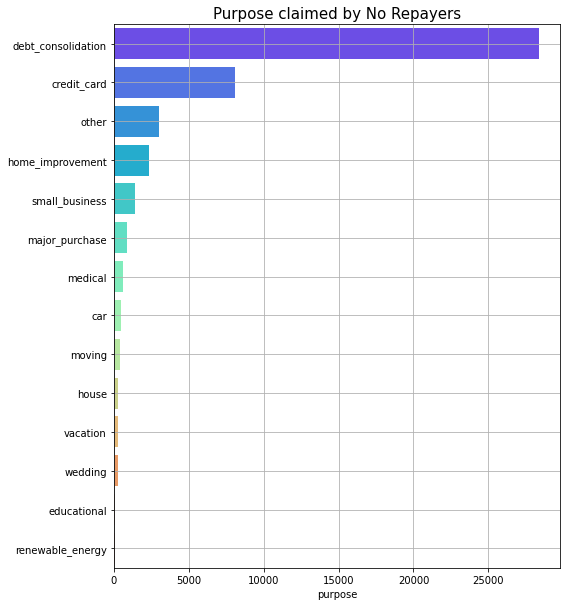

In [339]:
c = No_repayers['purpose'].value_counts()
plt.figure(figsize=(8,10))
plt.title("Purpose claimed by No Repayers", fontsize = 15)
sns.barplot(x = c, y = c.index, orient= 'h', palette= 'rainbow')
plt.grid()
plt.show()

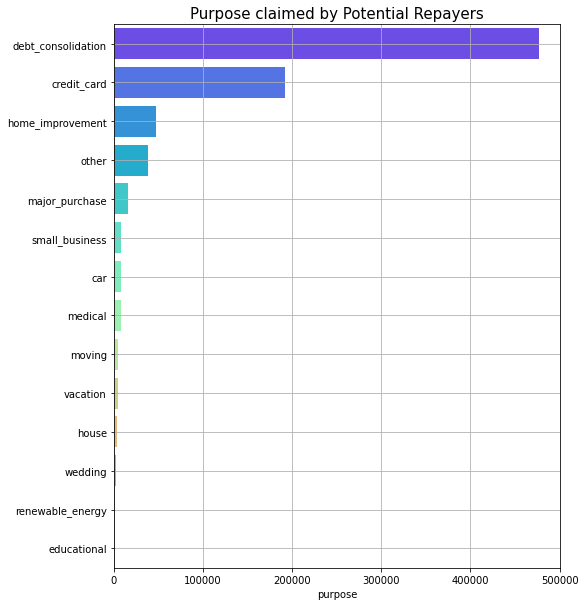

In [340]:
c = Repayers['purpose'].value_counts()
plt.figure(figsize=(8,10))
plt.title("Purpose claimed by Potential Repayers", fontsize = 15)
sns.barplot(x = c, y = c.index, orient= 'h', palette= 'rainbow')
plt.grid()
plt.show()

###### We can see a good few columns are having missing values and few are really high. Imputing a column with more than 50% null values is impossible so let's remove them.

Missing Value Analysis

In [100]:
x = df.isnull().sum()*100/df.shape[0]
more_than_50_percent_nulls = x[x> 50].index.tolist()

In [101]:
df.drop(more_than_50_percent_nulls , axis = 1, inplace = True)

In [102]:
df.drop(Dropables, axis =1 , inplace= True)

In [103]:
df.shape

(855969, 47)

In [136]:
df.isnull().sum()[df.isnull().sum() > 0]

revol_util                       446
last_pymnt_d                    8862
next_pymnt_d                  252971
last_credit_pull_d                50
collections_12_mths_ex_med        56
tot_coll_amt                   67313
tot_cur_bal                    67313
total_rev_hi_lim               67313
dtype: int64

In [105]:
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace = True)

In [138]:
in_normal_dist_or_not['revol_util']

'Not Normal Distribution'

In [139]:
# Since revol_util is not in normal distribution imputing it with median
df['revol_util'].fillna(df['revol_util'].median(), inplace = True)

In [142]:
in_normal_dist_or_not['collections_12_mths_ex_med']

'Not Normal Distribution'

In [143]:
# Since collections_12_mths_ex_med is not in normal distribution imputing it with median
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median(), inplace = True)

In [144]:
in_normal_dist_or_not['tot_coll_amt']

'Not Normal Distribution'

In [145]:
# Since tot_coll_amt is not in normal distribution imputing it with median
df['tot_coll_amt'].fillna(df['tot_coll_amt'].median(), inplace = True)

In [146]:
in_normal_dist_or_not['tot_cur_bal']

'Not Normal Distribution'

In [147]:
# Since tot_cur_bal is not in normal distribution imputing it with median
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(), inplace = True)

In [148]:
in_normal_dist_or_not['total_rev_hi_lim']

'Not Normal Distribution'

In [149]:
# Since total_rev_hi_lim is not in normal distribution imputing it with median
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median(), inplace = True)

# ***Data Preprocessing***

In [56]:
def unique_shower(x):
  print(x.unique())

In [115]:
unique_shower(df['verification_status'])

['Verified' 'Source Verified' 'Not Verified']


In [106]:
df['term'].replace({' 60 months:':1, ' 36 months': 0}, inplace = True)
df['term'] = df['term'].astype('category')
df['term'] = df['term'].cat.codes

In [107]:
df['grade'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}, inplace = True)
df['grade'] = df['grade'].astype('category')
df['grade'] = df['grade'].cat.codes

In [108]:
subs = ['A','B','C','D','E','F','G']
k = {}
cc = 0
for i in subs:
  for j in ['1','2','3','4','5']:
    c = i+j
    k[c] = cc
    cc += 1

In [109]:
df['sub_grade'].replace(k, inplace = True)
df['sub_grade'] = df['sub_grade'].astype('category')
df['sub_grade'] = df['sub_grade'].cat.codes

In [112]:
df['emp_length'].replace({'10+ years':11, '< 1 year':0, '1 year':1 ,'3 years':4, '8 years':9, '9 years':10, '4 years':5,'5 years':6, '6 years':7, '2 years':3, '7 years':8}, inplace = True)
df['emp_length'] = df['emp_length'].astype('category')
df['emp_length'] = df['emp_length'].cat.codes

In [114]:
df['home_ownership'].replace({'RENT':4 ,'OWN':5, 'MORTGAGE':2, 'OTHER':3 ,'NONE':0, 'ANY':1}, inplace = True)
df['home_ownership'] = df['home_ownership'].astype('category')
df['home_ownership'] = df['home_ownership'].cat.codes

In [116]:
df['verification_status'].replace({'Verified':1, 'Source Verified':2, 'Not Verified':0}, inplace = True)
df['verification_status'] = df['verification_status'].astype('category')
df['verification_status'] = df['verification_status'].cat.codes

In [119]:
df['pymnt_plan'].replace({'n':0, 'y':1}, inplace = True)
df['pymnt_plan'] = df['pymnt_plan'].astype('category')
df['pymnt_plan'] = df['pymnt_plan'].cat.codes

In [124]:
df['initial_list_status'].replace({'f':0, 'w':1}, inplace = True)
df['initial_list_status'] = df['initial_list_status'].astype('category')
df['initial_list_status'] = df['initial_list_status'].cat.codes

In [133]:
df['application_type'].replace({'INDIVIDUAL':0, 'JOINT':1}, inplace = True)
df['application_type'] = df['application_type'].astype('category')
df['application_type'] = df['application_type'].cat.codes

In [152]:
pca_dropbales = df.select_dtypes(include = [np.object]).columns.tolist()

In [150]:
df.select_dtypes(include = [np.number])

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,10,4,24000.0,1,0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1.0,0,0.0,0.0,81008.5,23800.0,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,0,4,30000.0,2,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,0,0.0,0.0,81008.5,23800.0,1
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,14,10,4,12252.0,0,0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1.0,0,0.0,0.0,81008.5,23800.0,0
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10,10,4,49200.0,2,0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1.0,0,0.0,0.0,81008.5,23800.0,0
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,1,4,80000.0,2,0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1.0,0,0.0,0.0,81008.5,23800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000.0,10000.0,10000.0,0,11.99,332.10,1,9,8,4,31000.0,1,0,28.69,0.0,0.0,9.0,1.0,14037.0,82.1,15.0,0,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,0.00,332.10,0.0,1.0,0,0.0,0.0,25274.0,17100.0,0
855965,24000.0,24000.0,24000.0,0,11.99,797.03,1,9,10,2,79000.0,1,0,3.90,0.0,1.0,5.0,0.0,8621.0,84.5,23.0,0,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,0.00,797.03,0.0,1.0,0,0.0,0.0,140285.0,10200.0,0
855966,13000.0,13000.0,13000.0,1,15.99,316.07,3,16,5,4,35000.0,1,0,30.90,0.0,0.0,9.0,1.0,11031.0,61.3,22.0,1,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,0.00,316.07,0.0,1.0,0,0.0,0.0,34178.0,18000.0,0
855967,12000.0,12000.0,12000.0,1,19.99,317.86,4,22,1,4,64400.0,2,0,27.19,1.0,2.0,17.0,0.0,8254.0,30.6,20.0,1,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,0.00,0.00,317.86,1.0,1.0,0,0.0,0.0,58418.0,27000.0,0


In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'])
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])

In [ ]:
df = pd.get_dummies(df, columns=['purpose'], drop_first = True, prefix= 'purpose')
df = pd.get_dummies(df, columns = ['addr_state'], drop_first=  True, prefix = 'addr_state')

# ***Dimensionality Reduction***

Since we have so many dimensions, let's try to use PCA and draw PCs.

The trick here is to find which columns contribute to the sheer voulme of variance within the data.

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20)

In [191]:
pca_df = df.drop(pca_dropbales, axis = 1)

In [154]:
pca_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,10,4,24000.0,1,0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1.0,0,0.0,0.0,81008.5,23800.0,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,0,4,30000.0,2,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,0,0.0,0.0,81008.5,23800.0,1
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,14,10,4,12252.0,0,0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1.0,0,0.0,0.0,81008.5,23800.0,0
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10,10,4,49200.0,2,0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1.0,0,0.0,0.0,81008.5,23800.0,0
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,1,4,80000.0,2,0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1.0,0,0.0,0.0,81008.5,23800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000.0,10000.0,10000.0,0,11.99,332.10,1,9,8,4,31000.0,1,0,28.69,0.0,0.0,9.0,1.0,14037.0,82.1,15.0,0,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,0.00,332.10,0.0,1.0,0,0.0,0.0,25274.0,17100.0,0
855965,24000.0,24000.0,24000.0,0,11.99,797.03,1,9,10,2,79000.0,1,0,3.90,0.0,1.0,5.0,0.0,8621.0,84.5,23.0,0,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,0.00,797.03,0.0,1.0,0,0.0,0.0,140285.0,10200.0,0
855966,13000.0,13000.0,13000.0,1,15.99,316.07,3,16,5,4,35000.0,1,0,30.90,0.0,0.0,9.0,1.0,11031.0,61.3,22.0,1,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,0.00,316.07,0.0,1.0,0,0.0,0.0,34178.0,18000.0,0
855967,12000.0,12000.0,12000.0,1,19.99,317.86,4,22,1,4,64400.0,2,0,27.19,1.0,2.0,17.0,0.0,8254.0,30.6,20.0,1,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,0.00,0.00,317.86,1.0,1.0,0,0.0,0.0,58418.0,27000.0,0


In [199]:
orignal_col_names = pca_df.columns

# ***Feature Scaling the dataset*** using standard scaler


In [158]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
pca_df = ss.fit_transform(pca_df)

In [ ]:
# Fitting the data

In [184]:
model = pca.fit(pca_df)

In [181]:
transformed_companets = pca.transform(pca_df)

In [373]:
# derived Components

In [182]:
transformed_companets

array([[-3.07783464, -1.21049657,  0.29000324, ..., -0.57974509,
         0.22128299,  0.78721908],
       [-3.6696108 , -1.53825247, -2.50051595, ..., -1.22913422,
         2.36772665,  2.21211158],
       [-3.59249473, -1.54625269, -1.45410544, ..., -0.44027722,
        -0.58542043,  1.16696936],
       ...,
       [-0.62568131,  0.73102624, -2.31161329, ...,  1.11670541,
        -0.61518   , -0.64231346],
       [-0.20913708,  0.57497379, -3.45235152, ...,  0.16438385,
         0.62280503,  0.48849988],
       [ 0.87278807,  0.54557556,  0.24304104, ...,  0.05863513,
        -0.75321293,  0.24254528]])

In [183]:
# Checking the amount of variance explained by the components
pca.explained_variance_ratio_.sum()

0.8807844642578057

In [188]:
number_of_componets = model.components_.shape[0]

In [189]:
most_important = [np.abs(model.components_[i]).argmax() for i in range(number_of_componets)]

In [374]:
# Deriving the features contribution to each component
initial_feature_names  =  orignal_col_names
most_important_names = [initial_feature_names[most_important[i]] for i in range(number_of_componets)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(number_of_componets)}
df_fi = pd.DataFrame(dic.items())

In [207]:
df_fi.columns = ['Principle_components', 'Feature_that_contributed_the_most']

In [208]:
df_fi

,Principle_components,Feature_that_contributed_the_most
0,PC0,funded_amnt
1,PC1,out_prncp_inv
2,PC2,sub_grade
3,PC3,recoveries
4,PC4,open_acc
5,PC5,revol_bal
6,PC6,home_ownership
7,PC7,dti
8,PC8,acc_now_delinq
9,PC9,total_rec_late_fee


# ***Mathematically these 20 features explains 89% of the variance in the dataset, which means there is a very high chance for them to be the key players indicating an applicant as a potential repayer or no repayer***

# ***Oversampling The Dataset***

# ***In the very begining of the analysis we found out that this dataset is imbalanced. Thus let's oversample it using smote***

In [226]:
import imblearn

In [227]:
from imblearn.over_sampling import SMOTE

In [241]:
t_x = X.drop(['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d'], axis = 1)
#X.isnull().sum()[X.isnull().sum()>0]

In [242]:
y = df['default_ind']
oversmpl = SMOTE()
smoted_X,smoted_y  = oversmpl.fit_resample(t_x,y)
#X, y = oversample.fit_resample(X, y)

In [243]:
from sklearn.model_selection import train_test_split

In [223]:
# Train Test split

In [244]:
X_train, X_test, y_train,y_test = train_test_split(smoted_X,smoted_y)

In [245]:
for i in [X_train, X_test, y_train,y_test]:
  print(i.shape)

(1214253, 102)
(404751, 102)
(1214253,)
(404751,)


***Building the Random Forest Model***

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [385]:
#rfcl = RandomForestClassifier(n_jobs= -1, n_estimators= 10, max_depth = 15,min_samples_split=0.25, min_samples_leaf= 5, max_features= 25)
rfcl = RandomForestClassifier(n_jobs= -1, n_estimators= 10)

In [386]:
rfcl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [387]:
preds = rfcl.predict(X_test)

In [398]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [389]:
accuracy_score(preds, y_test)

0.998396545036331

In [390]:
confusion_matrix(preds, y_test)

array([[202435,    641],
       [     8, 201667]])

In [399]:
# F1 score best suits as an evaluation metrics for evaluating this model. 
# Since this dataset is imbalanced and our problem statement looks for equal penalizaiton of type 1 and type 2 errors.
# f1 score does justice
f1_score(preds, y_test)

0.9983934967560516

In [391]:
# Since it is a precooked dataset, it's giving 99% accuracy. But let's try to see how good the KPIs from random forest fits the inference we drew using PCA
importance_df = pd.DataFrame([rfcl.feature_importances_ , np.array(t_x.columns)]).T
importance_df.columns = ['importance','features']
importance_df.sort_values(by = 'importance', ascending = False, inplace = True)
importance_df.reset_index(drop = True)
importance_df.head(35)

,importance,features
22,0.217365,out_prncp
23,0.128631,out_prncp_inv
29,0.109755,recoveries
30,0.101694,collection_recovery_fee
31,0.0738184,last_pymnt_amnt
21,0.0703021,initial_list_status
26,0.0305266,total_rec_prncp
6,0.0299786,grade
40,0.0243053,purpose_debt_consolidation
11,0.0212246,verification_status


# *** Principle Component Analysis Can't handle categorical data, we have removed nomials out of the dataset we have used to create the components. So if the random forest importance could explain 70% of features selected from the PCA we are on a positive slope***

In [395]:
set(df_fi[1]) - set(importance_df.iloc[0:45,1])

{'acc_now_delinq',
 'application_type',
 'collections_12_mths_ex_med',
 'pymnt_plan',
 'tot_coll_amt'}

In [396]:
# Only 5 out of 20 variables were missied by the random forest's feature importance. This could be because of the gini impurity caused by the categorical features
# Purpose and Address and we can also see these two feature were pretty salient in the feature_importance derived.

## ***Most Important KPIs ***

In [402]:
KPIs = set(df_fi[1][0:11]).union(set(importance_df.iloc[0:21,1]))

In [403]:
KPIs

{'acc_now_delinq',
 'application_type',
 'collection_recovery_fee',
 'dti',
 'emp_length',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'initial_list_status',
 'inq_last_6mths',
 'int_rate',
 'last_pymnt_amnt',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'recoveries',
 'revol_bal',
 'sub_grade',
 'term',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_late_fee',
 'total_rec_prncp',
 'verification_status'}